In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("cleaned_network_data.csv")

In [3]:
feature_cols = [
    'latency_sec', 'bandwidth_mbps', 'dropped_calls', 'total_calls', 
    'uptime_percent', 'users_connected', 'download_speed_mbps', 'upload_speed_mbps',
    'signal_strength.RSSI', 'signal_strength.RSRP', 'signal_strength.SINR',
    'tower_load_percent', 'average_call_duration_sec', 'handover_success_rate',
    'packet_loss_percent', 'jitter_ms', 'tower_temperature_c', 'battery_backup_hours',
    'tower_age_years'
]

In [4]:
# Extract features
X = df[feature_cols]

In [5]:
# Standardize features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Choose number of clusters (let's start with 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


In [7]:
print("Cluster labels assigned:")
print(df["cluster"].value_counts())

Cluster labels assigned:
cluster
1    4714
2    2389
0    1897
Name: count, dtype: int64


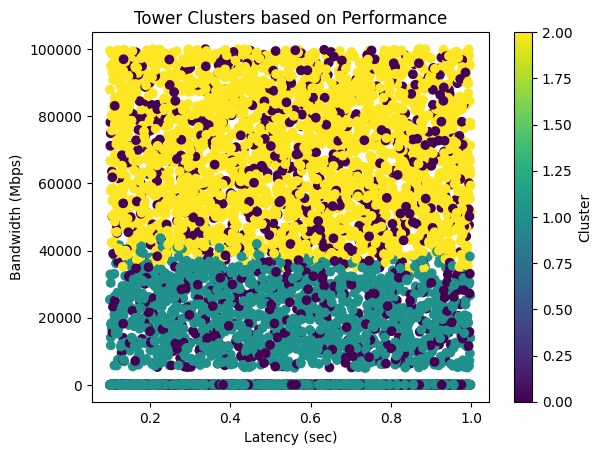

In [8]:
plt.scatter(df["latency_sec"], df["bandwidth_mbps"], c=df["cluster"], cmap="viridis")
plt.xlabel("Latency (sec)")
plt.ylabel("Bandwidth (Mbps)")
plt.title("Tower Clusters based on Performance")
plt.colorbar(label="Cluster")
plt.show()